In [45]:
import re #provides support for regular expressions in Python
import jieba #a library that is essential for breaking down Chinese text into individual words or phrases
import pandas as pd #provides data structures like DataFrame that make working with structured data more convenient.
import seaborn as sns #a visualization library based on matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics
import matplotlib.pyplot as plt #used for creating static, interactive, and animated visualizations
from collections import Counter #particularly useful for counting word frequencies in this case
import numpy as np #provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays

In [30]:
def is_chinese_char(char): #  Check if a given character is a Chinese character
    return '\u4e00' <= char <= '\u9fff' #checks if the input character falls within the Unicode range for Chinese characters


In [31]:
def separate_chinese_english(text): #Separate Chinese and English text from the input
    chinese_text = ''.join([char if is_chinese_char(char) else '' for char in text]) #iterate through each character in text. It calls the is_chinese_char function to check if a character is Chinese. If it is, the character is included in chinese_text; otherwise, it's ignored.
    english_text = ' '.join(re.findall(r'[a-zA-Z\']+', text)) #find all sequences of English alphabets (and apostrophes) in text. These sequences are then joined into a single string english_text, separated by spaces.
    return chinese_text, english_text #returns two strings: chinese_text containing only Chinese characters and english_text containing only English words

In [32]:
def tokenize_chinese_text(text): #Tokenize Chinese text using jieba
    return jieba.lcut(text) #Uses jieba.lcut method to tokenize the input text into a list of words/phrases and return this list


In [33]:
file_path = 'lyrics.txt' #sets the variable file_path to the path of the lyrics file
with open(file_path, 'r', encoding='utf-8') as file: #Opens the file located at file_path in read mode ('r') with UTF-8 encoding
    lyrics = file.read() #Reads the entire content of the file into the string variable

In [34]:
chinese_text, _ = separate_chinese_english(lyrics) #Calls the separate_chinese_english function on lyrics to separate Chinese text
chinese_tokens = tokenize_chinese_text(chinese_text) #Tokenizes the chinese_text using tokenize_chinese_text function
word_freq = Counter(chinese_tokens) #Creates a Counter object word_freq from the list chinese_tokens. This counts the frequency of each unique word in the list.

In [37]:
sns.set_theme(style="darkgrid")
# Creating DataFrame with word-frequency data
df = pd.DataFrame.from_records(list(dict(Counter(chinese_tokens)).items()), columns=['word','frequency'])

In [38]:
# Each word gets a rank based on its frequency
df = df.sort_values(by=['frequency'], ascending=False)
df['rank'] = list(range(1, len(df) + 1))
df

,word,frequency,rank
6,的,2261,1
24,我,2179,2
61,你,1130,3
26,在,579,4
52,是,489,5
...,...,...,...
4229,电压,1,8328
4228,艾尼路,1,8329
4227,三遍,1,8330
4226,最高,1,8331


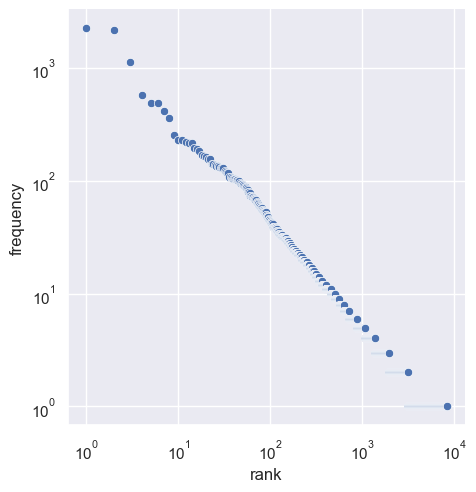

In [39]:
g = sns.relplot(x="rank", y="frequency", data=df) #Creates a relational plot using seaborn. This plot will have 'log_rank' on the x-axis and 'log_freq' on the y-axis.
g.set(xscale="log")
g.set(yscale="log")

In [40]:
df['ln_frequency']=np.log(df['frequency'])
df['ln_rank']=np.log(df['rank'])

In [41]:
df.to_csv("chinese_frequencies.csv") #We create a csv file to later plot 2 languages on the same graph

In [42]:
y=df['ln_frequency']
x=df['ln_rank']

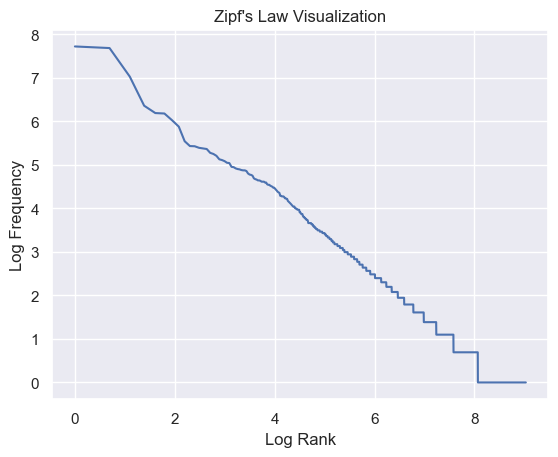

In [44]:
fig, ax = plt.subplots()
ax.plot(x,y,)
plt.title('Zipf\'s Law Visualization') #Sets the title of the plot to 'Zipf's Law Visualization'.
plt.xlabel('Log Rank') #Sets the label for the x-axis to 'Log Rank'.
plt.ylabel('Log Frequency') #Sets the label for the y-axis to 'Log Frequency'.
plt.show() #Displays the plot